## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#from scipy.stats import sem

# Study data files
mouse_metadata_path =  (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Matplotlib\The-Power-of-Plots\Data\Mouse_metadata.csv")
study_results_path = (r"C:\Users\yenia\Desktop\JHU_Bootcamp\Homework\Matplotlib\The-Power-of-Plots\Data\Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data_df = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
merged_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count = merged_data_df.index
number_of_rows = len(count)
print(number_of_rows)

1893


In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
time_dup_df = merged_data_df[merged_data_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep =False)]
time_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mouse_df = merged_data_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep =False)
clean_data_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [35]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(clean_data_mouse_df)
print(num_mice)

1883


## Summary Statistics

In [36]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_grouped = clean_data_mouse_df.groupby("Drug Regimen")
tumor_mean = drug_grouped["Tumor Volume (mm3)"].mean ()
tumor_median = drug_grouped["Tumor Volume (mm3)"].median()
tumor_var = drug_grouped["Tumor Volume (mm3)"].var()
std_tumor= drug_grouped["Tumor Volume (mm3)"].std()
sem_tumor = drug_grouped["Tumor Volume (mm3)"].sem()
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_results= ({
    "Average Tumor Volume":tumor_mean, 
    "Median Tumor Volume":tumor_median, 
    "Tumor Volume Variance": tumor_var,
    "Tumor Volume Standard Deviation": std_tumor, 
    "Tumor Volume SEM": sem_tumor
})

#Combine series into a dataframe
summary_results_df = pd.DataFrame(summary_results)
summary_results_df



,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_df = summary_results_df.agg({"Average Tumor Volume": ["mean"],"Median Tumor Volume":["median"],"Tumor Volume Variance":["var"],"Tumor Volume Standard Deviation":["std"],"Tumor Volume SEM":["sem"]})
agg_df
#clean_agg_df = agg_df.dropna(axis = 0, how = "any")
#clean_agg_df

,Average Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
mean,50.989715,NaN,NaN,NaN,NaN
median,NaN,51.819532,NaN,NaN,NaN
sem,NaN,NaN,NaN,NaN,0.032665
std,NaN,NaN,NaN,1.215829,NaN
var,NaN,NaN,256.094149,NaN,NaN


## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     151
Name: Drug Regimen, dtype: int64


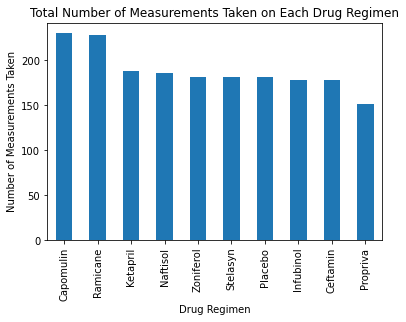

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# use clean_data_mouse_df to determine the number of times each drug regimen was implemented
num_measurements= clean_data_mouse_df["Drug Regimen"].value_counts()
print(num_measurements)

#Create a bar chart of the data
num_measurements.plot(x = clean_data_mouse_df["Drug Regimen"],y = num_measurements, kind ="bar", width = .5)

#Create a title
plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.show()

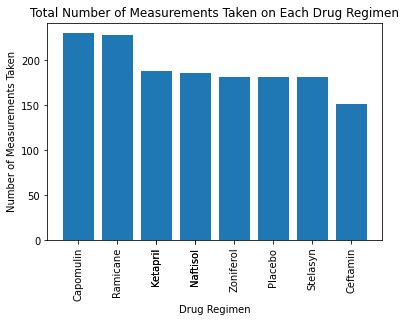

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn","Naftisol", "Ketapril", "Ceftamin"]


x_axis = np.arange(len(drug_regimen))
y_axis = np.arange(len(num_measurements))


plt.title("Total Number of Measurements Taken on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements Taken")
plt.bar(drug_regimen, num_measurements)
plt.xticks(drug_regimen, rotation='vertical')
plt.show()


# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_data_mouse_df["Sex"].value_counts()
grouped = clean_data_mouse_df.groupby(["Drug Regimen","Sex"])
sum_it_up = grouped.count()
sum_it_up
#female ="Female"
#female_only= sum_it_up.loc[female]
#female_only
#female
#female =clean_data_mouse_df.loc[clean_data_mouse_df["Sex"] == "Female",:]
#male = 
#x_axis = [male, female]
#y_axis = clean

#plt.scatter(x,y marker="o", facecolors="red", edgecolors="black")


Male      958
Female    925
Name: Sex, dtype: int64


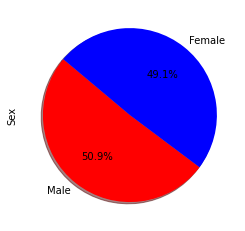

In [81]:
gender = clean_data_mouse_df["Sex"].value_counts()
print(gender)
labels = ["Female","Male"]
colors = ["red", "blue"]

pie = gender.plot.pie(colors = colors, autopct ="%1.1f%%", shadow=True, startangle=140 )

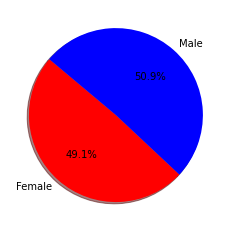

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male, "Female"]
sizes = [925,958]
colors = ["red", "blue"]
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title = "Sex"

## Quartiles, Outliers and Boxplots

In [63]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Capomulin", :]
Capomulin_final_time_pt = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_final_time_pt
Capomulin_vol = pd.DataFrame(Capomulin_final_time_pt)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_data_mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")
Capomulin_merge.head()

Ramicane
Capomulin_df = clean_data_mouse_df.loc[clean_data_mouse_df["Drug Regimen"] == "Capomulin", :]
Capomulin_final_time_pt = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_final_time_pt
Capomulin_vol = pd.DataFrame(Capomulin_final_time_pt)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_vol, clean_data_mouse_df, on = ("Mouse ID", "Timepoint"), how = "left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = temperatures.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
